In [76]:
from IPython.core.display import display, HTML
from IPython.display import clear_output
display(HTML("<style>.container { width:90% }</style>"))
import warnings
warnings.filterwarnings('ignore')
# ------------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sample_data
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
from datetime import datetime



In [13]:
org_df = pd.read_csv('organics.csv')

org_df


,ID,DemAffl,DemAge,DemCluster,DemClusterGroup,DemGender,DemReg,DemTVReg,PromClass,PromSpend,PromTime,TargetBuy,TargetAmt
0,140,10.0,76.0,16.0,C,U,Midlands,Wales & West,Gold,16000.00,4.0,0,0
1,620,4.0,49.0,35.0,D,U,Midlands,Wales & West,Gold,6000.00,5.0,0,0
2,868,5.0,70.0,27.0,D,F,Midlands,Wales & West,Silver,0.02,8.0,1,1
3,1120,10.0,65.0,51.0,F,M,Midlands,Midlands,Tin,0.01,7.0,1,1
4,2313,11.0,68.0,4.0,A,F,Midlands,Midlands,Tin,0.01,8.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22218,52834058,13.0,65.0,9.0,B,F,South East,London,Silver,1500.00,5.0,0,0
22219,52834376,15.0,73.0,34.0,D,U,South East,S & S East,Gold,6053.06,12.0,0,0
22220,52837057,9.0,70.0,15.0,B,F,North,Yorkshire,Gold,6000.00,5.0,0,0
22221,52838096,11.0,66.0,8.0,B,F,North,N West,Silver,5000.00,5.0,0,0


In [14]:
org_df.isna().sum() / len(org_df) * 100

ID                  0.000000
DemAffl             4.882329
DemAge              6.785762
DemCluster          3.032894
DemClusterGroup     3.032894
DemGender          11.303604
DemReg              2.092427
DemTVReg            2.092427
PromClass           0.000000
PromSpend           0.000000
PromTime            1.264456
TargetBuy           0.000000
TargetAmt           0.000000
dtype: float64

In [15]:
org_df.isna().sum()

ID                    0
DemAffl            1085
DemAge             1508
DemCluster          674
DemClusterGroup     674
DemGender          2512
DemReg              465
DemTVReg            465
PromClass             0
PromSpend             0
PromTime            281
TargetBuy             0
TargetAmt             0
dtype: int64

In [16]:
type(org_df.isna().sum() / len(org_df) * 100)

pandas.core.series.Series

In [17]:
# Get the "Mode" from each column in case it can be used as the fill up the missing values.
def get_modes_for_columns(df, column_list):
    modes = {}
    for column in column_list:
        mode_value = df[column].mode().iloc[0] if not df[column].mode().empty else None
        modes[column] = mode_value
    return pd.Series(modes)

df = org_df
column_list = ['ID',	
               'DemAffl', 
               'DemAge', 
               'DemCluster', 
               'DemClusterGroup', 
               'DemGender', 
               'DemReg', 
               'DemTVReg', 
               'PromClass', 
               'PromSpend', 
               'PromTime', 
               'TargetBuy', 
               'TargetAmt']  

modes_series = get_modes_for_columns(df, column_list)
print("Modes for selected columns:")
print(modes_series)



Modes for selected columns:
ID                        140
DemAffl                   8.0
DemAge                   51.0
DemCluster               52.0
DemClusterGroup             C
DemGender                   F
DemReg             South East
DemTVReg               London
PromClass              Silver
PromSpend                0.01
PromTime                  5.0
TargetBuy                   0
TargetAmt                   0
dtype: object


In [18]:
# Missing values over 5% will be dropped.
org_df_temp = org_df.drop(columns = ["DemGender", "DemAge", "TargetAmt"])
org_df_temp

,ID,DemAffl,DemCluster,DemClusterGroup,DemReg,DemTVReg,PromClass,PromSpend,PromTime,TargetBuy
0,140,10.0,16.0,C,Midlands,Wales & West,Gold,16000.00,4.0,0
1,620,4.0,35.0,D,Midlands,Wales & West,Gold,6000.00,5.0,0
2,868,5.0,27.0,D,Midlands,Wales & West,Silver,0.02,8.0,1
3,1120,10.0,51.0,F,Midlands,Midlands,Tin,0.01,7.0,1
4,2313,11.0,4.0,A,Midlands,Midlands,Tin,0.01,8.0,0
...,...,...,...,...,...,...,...,...,...,...
22218,52834058,13.0,9.0,B,South East,London,Silver,1500.00,5.0,0
22219,52834376,15.0,34.0,D,South East,S & S East,Gold,6053.06,12.0,0
22220,52837057,9.0,15.0,B,North,Yorkshire,Gold,6000.00,5.0,0
22221,52838096,11.0,8.0,B,North,N West,Silver,5000.00,5.0,0


In [19]:
org_df_fin = org_df_temp.dropna()
org_df_fin

,ID,DemAffl,DemCluster,DemClusterGroup,DemReg,DemTVReg,PromClass,PromSpend,PromTime,TargetBuy
0,140,10.0,16.0,C,Midlands,Wales & West,Gold,16000.00,4.0,0
1,620,4.0,35.0,D,Midlands,Wales & West,Gold,6000.00,5.0,0
2,868,5.0,27.0,D,Midlands,Wales & West,Silver,0.02,8.0,1
3,1120,10.0,51.0,F,Midlands,Midlands,Tin,0.01,7.0,1
4,2313,11.0,4.0,A,Midlands,Midlands,Tin,0.01,8.0,0
...,...,...,...,...,...,...,...,...,...,...
22218,52834058,13.0,9.0,B,South East,London,Silver,1500.00,5.0,0
22219,52834376,15.0,34.0,D,South East,S & S East,Gold,6053.06,12.0,0
22220,52837057,9.0,15.0,B,North,Yorkshire,Gold,6000.00,5.0,0
22221,52838096,11.0,8.0,B,North,N West,Silver,5000.00,5.0,0


In [20]:
org_df_fin.isna().sum() / len(org_df_fin) * 100

ID                 0.0
DemAffl            0.0
DemCluster         0.0
DemClusterGroup    0.0
DemReg             0.0
DemTVReg           0.0
PromClass          0.0
PromSpend          0.0
PromTime           0.0
TargetBuy          0.0
dtype: float64

In [21]:
org_df_fin['TargetBuy'] = org_df_fin['TargetBuy'].astype('category')
org_df_fin.head()

,ID,DemAffl,DemCluster,DemClusterGroup,DemReg,DemTVReg,PromClass,PromSpend,PromTime,TargetBuy
0,140,10.0,16.0,C,Midlands,Wales & West,Gold,16000.00,4.0,0
1,620,4.0,35.0,D,Midlands,Wales & West,Gold,6000.00,5.0,0
2,868,5.0,27.0,D,Midlands,Wales & West,Silver,0.02,8.0,1
3,1120,10.0,51.0,F,Midlands,Midlands,Tin,0.01,7.0,1
4,2313,11.0,4.0,A,Midlands,Midlands,Tin,0.01,8.0,0


In [22]:
le = LabelEncoder()
org_df_fin['DemClusterGroup'] = le.fit_transform(org_df_fin['DemClusterGroup'])
org_df_fin

,ID,DemAffl,DemCluster,DemClusterGroup,DemReg,DemTVReg,PromClass,PromSpend,PromTime,TargetBuy
0,140,10.0,16.0,2,Midlands,Wales & West,Gold,16000.00,4.0,0
1,620,4.0,35.0,3,Midlands,Wales & West,Gold,6000.00,5.0,0
2,868,5.0,27.0,3,Midlands,Wales & West,Silver,0.02,8.0,1
3,1120,10.0,51.0,5,Midlands,Midlands,Tin,0.01,7.0,1
4,2313,11.0,4.0,0,Midlands,Midlands,Tin,0.01,8.0,0
...,...,...,...,...,...,...,...,...,...,...
22218,52834058,13.0,9.0,1,South East,London,Silver,1500.00,5.0,0
22219,52834376,15.0,34.0,3,South East,S & S East,Gold,6053.06,12.0,0
22220,52837057,9.0,15.0,1,North,Yorkshire,Gold,6000.00,5.0,0
22221,52838096,11.0,8.0,1,North,N West,Silver,5000.00,5.0,0


In [23]:
category_mapping1 = {
    'Platinum': 0,
    'Gold': 1,
    'Silver': 2,
    'Tin': 3
}
org_df_fin['PromClass'] = org_df['PromClass'].map(category_mapping1)

category_mapping2 = {
    'Midlands': 0,
    'North': 1,
    'Scottish': 2,
    'South East': 3,
    'South West': 4
}
org_df_fin['DemReg'] = org_df['DemReg'].map(category_mapping2)

category_mapping3 = {
    'Border': 0,
    'C Scotland': 1,
    'East': 2,
    'London': 3,
    'Midlands': 4,
    'N East': 5,
    'N West': 6,
    'N Scot': 7,
    'S & S East': 8,
    'S West': 9,
    'Ulster': 10,
    'Wales & West': 11,
    'Yorkshire': 12
}
org_df_fin['DemTVReg'] = org_df['DemTVReg'].map(category_mapping3)
org_df_fin

,ID,DemAffl,DemCluster,DemClusterGroup,DemReg,DemTVReg,PromClass,PromSpend,PromTime,TargetBuy
0,140,10.0,16.0,2,0.0,11.0,1,16000.00,4.0,0
1,620,4.0,35.0,3,0.0,11.0,1,6000.00,5.0,0
2,868,5.0,27.0,3,0.0,11.0,2,0.02,8.0,1
3,1120,10.0,51.0,5,0.0,4.0,3,0.01,7.0,1
4,2313,11.0,4.0,0,0.0,4.0,3,0.01,8.0,0
...,...,...,...,...,...,...,...,...,...,...
22218,52834058,13.0,9.0,1,3.0,3.0,2,1500.00,5.0,0
22219,52834376,15.0,34.0,3,3.0,8.0,1,6053.06,12.0,0
22220,52837057,9.0,15.0,1,1.0,12.0,1,6000.00,5.0,0
22221,52838096,11.0,8.0,1,1.0,6.0,2,5000.00,5.0,0


In [24]:
# split the data into training and testing sets
X = org_df_fin.drop(['TargetBuy'], axis=1)

# X = pd.get_dummies(X, columns=['DemClusterGroup', 'DemReg', 'DemTVReg','PromClass'], drop_first=True, dtype='float')

y = org_df_fin['TargetBuy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)

X_train.info()
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17855 entries, 4503 to 17419
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               17855 non-null  int64  
 1   DemAffl          17855 non-null  float64
 2   DemCluster       17855 non-null  float64
 3   DemClusterGroup  17855 non-null  int32  
 4   DemReg           17855 non-null  float64
 5   DemTVReg         17855 non-null  float64
 6   PromClass        17855 non-null  int64  
 7   PromSpend        17855 non-null  float64
 8   PromTime         17855 non-null  float64
dtypes: float64(6), int32(1), int64(2)
memory usage: 1.3 MB
<class 'pandas.core.series.Series'>
Index: 17855 entries, 4503 to 17419
Series name: TargetBuy
Non-Null Count  Dtype   
--------------  -----   
17855 non-null  category
dtypes: category(1)
memory usage: 157.0 KB


# Decision Tree  
We will use 3 parameters to control the growth of the tree

- **max_depth** determines the maximum number of levels for the tree.  Smaller values help to prevent overfitting.  Default value = None

- **min_samples_leaf** determines the minimum number of observations that must remain in a leaf.  If a split leaves fewer than this number of observations, the split cannot be performed.  Larger values help to prevent overfitting.  Default value = 1.

- **ccp_alpha** is the cost complexity parameter and can be used for post-pruning the tree to help prevent overfitting.  Default value = 0.  Larger values yield a smaller tree.

In [25]:
# create an instance of a decision tree classifier using default values

dt = DecisionTreeClassifier(max_depth = 5, min_samples_leaf=25, ccp_alpha = 0.0001)

# fit the model to the training data
dt.fit(X_train, y_train)

# this code can be used to produce a textual representation of the tree if desired
# text_rep = tree.export_text(dt)
# print(text_rep)


DecisionTreeClassifier(ccp_alpha=0.0001, max_depth=5, min_samples_leaf=25)

# Visualize Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
# visualize the decision tree
dot_data = export_graphviz(dt, filled=True, rounded=True, feature_names=X.columns, class_names=['0', '1'])
graph = graphviz.Source(dot_data)
graph.render("decision_tree_default")

'decision_tree_default.pdf'

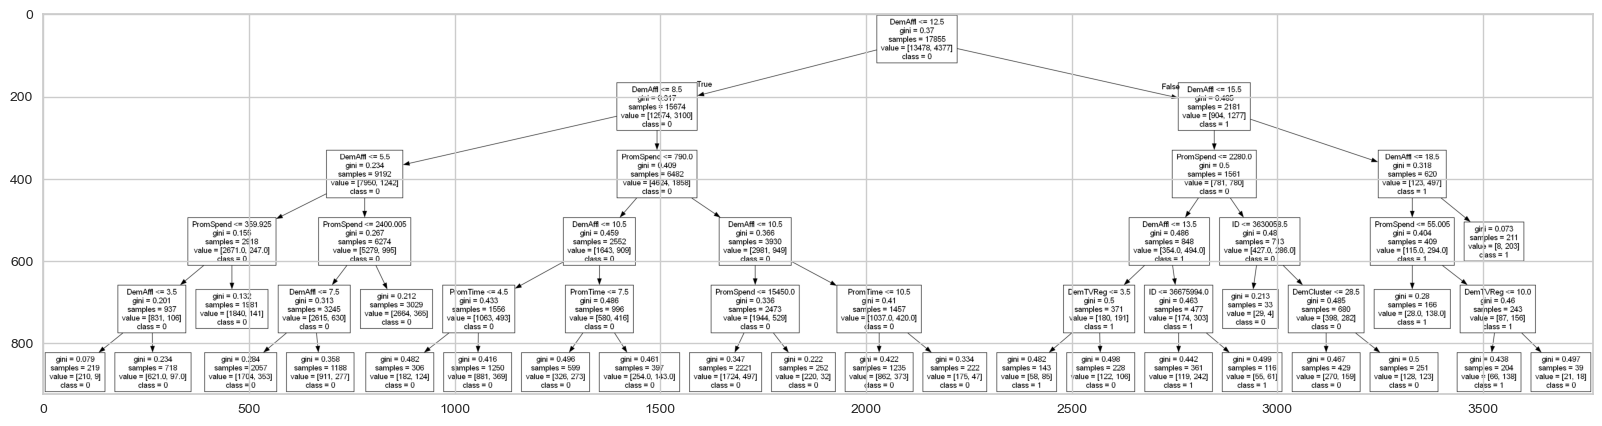

In [27]:
export_graphviz(dt,
                'tree.dot',
                class_names=['0','1'],
                feature_names = X_train.columns)
! dot -Tpng tree.dot -o tree.png

import matplotlib.pyplot as plt
import cv2
%matplotlib inline
img = cv2.imread('tree.png')
plt.figure(figsize = (20, 40))
plt.imshow(img)

In [28]:
# make predictions on the training and test data
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

y_prob_train = dt.predict_proba(X_train)
y_prob_test = dt.predict_proba(X_test)

In [29]:
# calculate the accuracy, precision, and recall scores
acc_train = accuracy_score(y_train, y_pred_train)
prec_train = precision_score(y_train, y_pred_train)
rec_train = recall_score(y_train, y_pred_train)

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc_train))
print("Precision: {:.4f}".format(prec_train))
print("Recall.  : {:.4f}".format(rec_train))
print("")

# calculate the accuracy, precision, and recall scores
acc_test = accuracy_score(y_test, y_pred_test)
prec_test = precision_score(y_test, y_pred_test)
rec_test = recall_score(y_test, y_pred_test)

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc_test))
print("Precision: {:.4f}".format(prec_test))
print("Recall.  : {:.4f}".format(rec_test))

 -- train set -- 
Accuracy : 0.7847
Precision: 0.7219
Recall.  : 0.1981

 -- test set -- 
Accuracy : 0.7863
Precision: 0.7313
Recall.  : 0.2016


# Standardize Data using StandardScaler

In [30]:
#Standardize Data
dfcolumns = org_df_fin.columns.values.tolist()

scaler = StandardScaler()

df_scaled = scaler.fit_transform(org_df_fin.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=dfcolumns)

df_scaled.dropna()


df_scaled.head()

,ID,DemAffl,DemCluster,DemClusterGroup,DemReg,DemTVReg,PromClass,PromSpend,PromTime,TargetBuy
0,-1.725996,0.377323,-0.706152,-0.400694,-1.230357,1.731135,-1.089843,1.508935,-0.557063,-0.569842
1,-1.725964,-1.377413,0.499696,0.231513,-1.230357,1.731135,-1.089843,0.201709,-0.341754,-0.569842
2,-1.725948,-1.084957,-0.008030,0.231513,-1.230357,1.731135,0.083575,-0.582624,0.304171,1.754873
3,-1.725931,0.377323,1.515148,1.495926,-1.230357,-0.425261,1.256992,-0.582626,0.088863,1.754873
4,-1.725852,0.669779,-1.467741,-1.665107,-1.230357,-0.425261,1.256992,-0.582626,0.304171,-0.569842


In [31]:
print(df_scaled.isna().sum().sum())

0


#How Many Clusters
Create an Elbow plot to provide guidance on how many clusters might be needed

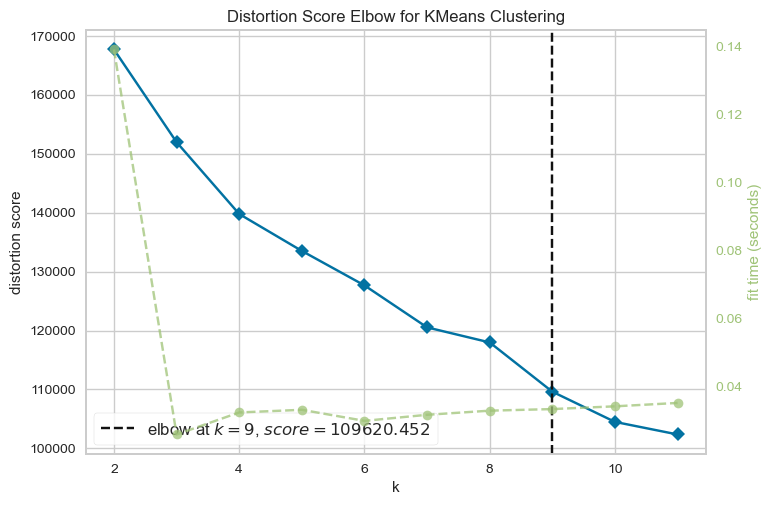

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [32]:
# set the model type to k-means
model = KMeans()

# generate an elbow plot for k = 2 to 12 clusters using the scaled data
visualizer = KElbowVisualizer(model, k=(2, 12))
visualizer.fit(df_scaled)
visualizer.show()

#Generate Clusters and Begin Profiling
- Evaluate cluster sizes
- Compute the mean of each input variable within each cluster

In [33]:
org_df_fin = pd.get_dummies(org_df_fin, columns=['TargetBuy'])

In [34]:
# Create an instance of KMeans with the desired value of k and fit to the scaled data
kmeans = KMeans(n_clusters=4, random_state=904)
kmclus=kmeans.fit(df_scaled)

clusters = kmeans.fit_predict(df_scaled)

#append cluster to original data
org_df_fin['cluster']=clusters

org_df_fin.info()

# Evaluate cluster sizes to insure that they are similar
print(org_df_fin['cluster'].value_counts())

# Examine the means of each variable by cluster
df_desc = org_df_fin.groupby('cluster').mean()
print(df_desc)

<class 'pandas.core.frame.DataFrame'>
Index: 19839 entries, 0 to 22222
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               19839 non-null  int64  
 1   DemAffl          19839 non-null  float64
 2   DemCluster       19839 non-null  float64
 3   DemClusterGroup  19839 non-null  int32  
 4   DemReg           19839 non-null  float64
 5   DemTVReg         19839 non-null  float64
 6   PromClass        19839 non-null  int64  
 7   PromSpend        19839 non-null  float64
 8   PromTime         19839 non-null  float64
 9   TargetBuy_0      19839 non-null  bool   
 10  TargetBuy_1      19839 non-null  bool   
 11  cluster          19839 non-null  int32  
dtypes: bool(2), float64(6), int32(2), int64(2)
memory usage: 1.6 MB
cluster
1    6404
2    6118
0    4622
3    2695
Name: count, dtype: int64
                   ID   DemAffl  DemCluster  DemClusterGroup    DemReg  \
cluster                            

Response Time


<Figure size 800x600 with 0 Axes>

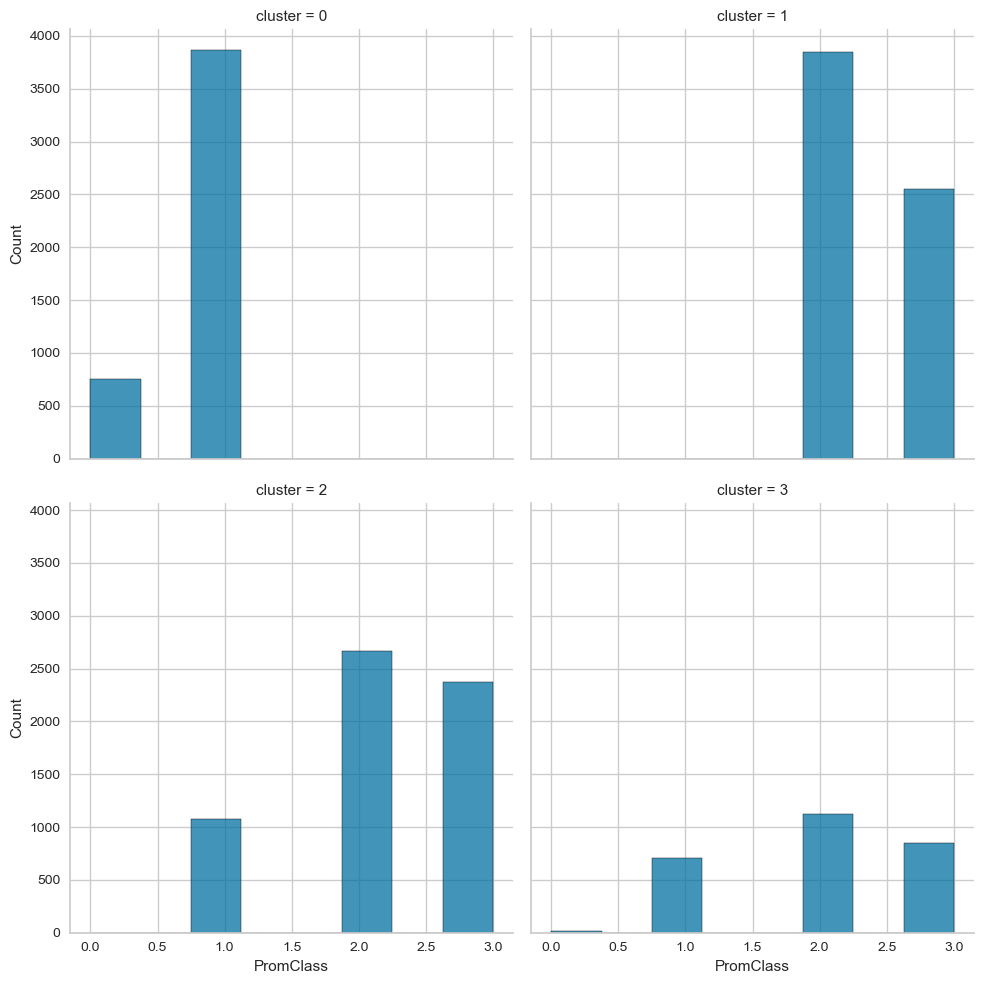

In [35]:
plt.figure(figsize=(8,6))
print("Response Time")
sns.displot(data=org_df_fin, x="PromClass", bins=8, col='cluster', col_wrap=2, common_bins=True)
plt.show()

# Make Predictions on the training and test data

In [38]:
# make predictions on the training and test data
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

y_prob_train = dt.predict_proba(X_train)
y_prob_test = dt.predict_proba(X_test)

## Assess Model on Training and Test data

In [39]:
# calculate the accuracy, precision, and recall scores
acc_train = accuracy_score(y_train, y_pred_train)
prec_train = precision_score(y_train, y_pred_train)
rec_train = recall_score(y_train, y_pred_train)

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc_train))
print("Precision: {:.4f}".format(prec_train))
print("Recall.  : {:.4f}".format(rec_train))
print("")

# calculate the accuracy, precision, and recall scores
acc_test = accuracy_score(y_test, y_pred_test)
prec_test = precision_score(y_test, y_pred_test)
rec_test = recall_score(y_test, y_pred_test)

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc_test))
print("Precision: {:.4f}".format(prec_test))
print("Recall.  : {:.4f}".format(rec_test))

 -- train set -- 
Accuracy : 0.7847
Precision: 0.7219
Recall.  : 0.1981

 -- test set -- 
Accuracy : 0.7863
Precision: 0.7313
Recall.  : 0.2016


#Generate a confusion matrix for the training and test data

In [40]:
# confusion matrix
conf_matrix = confusion_matrix(y_pred_train, y_train)
print(conf_matrix)

# Generate confusion matrix for test set
conf_matrix = confusion_matrix(y_pred_test, y_test)
print(conf_matrix)

[[13144  3510]
 [  334   867]]
[[1462  388]
 [  36   98]]


#Generate ROC curves for training and test data

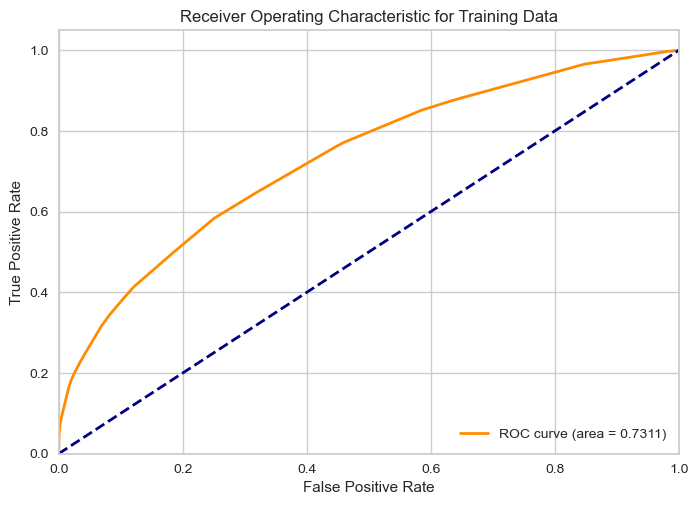

In [41]:
# Generate ROC curve for training data

fpr, tpr, thresholds = roc_curve(y_train.cat.codes, y_prob_train[:,1])
roc_auc = roc_auc_score(y_train.cat.codes, y_prob_train[:,1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Training Data')
plt.legend(loc='lower right')
plt.show()

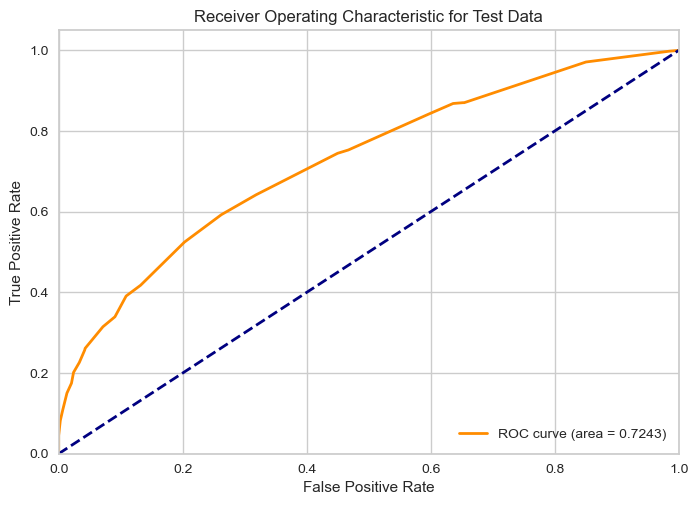

In [42]:
# Generate ROC curve for test data
fpr, tpr, thresholds = roc_curve(y_test.cat.codes, y_prob_test[:,1])
roc_auc = roc_auc_score(y_test.cat.codes, y_prob_test[:,1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Test Data')
plt.legend(loc='lower right')
plt.show()


#Print feature importance for the tree

   importance          feature
1    0.874821          DemAffl
7    0.093375        PromSpend
8    0.012913         PromTime
0    0.008770               ID
5    0.005763         DemTVReg
2    0.004358       DemCluster
3    0.000000  DemClusterGroup
4    0.000000           DemReg
6    0.000000        PromClass


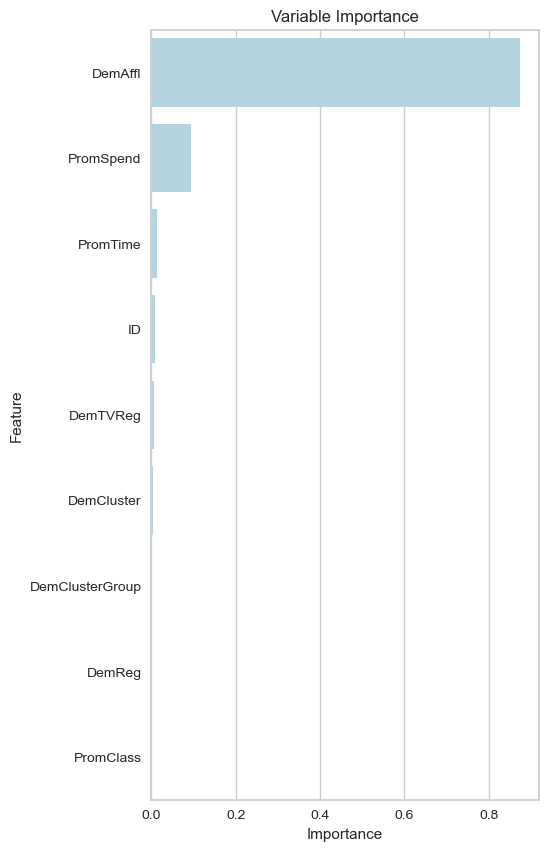

In [43]:
#calculate feature importance
tree_imp = dt.feature_importances_

#create a data frame with feature names

# creating a list of column names
column_values = ['importance']

# creating the dataframe
df = pd.DataFrame(data = tree_imp,
                  columns = column_values)
df['feature']=X.columns

#sort data so features with largest importance values are at the top
df2 = df.sort_values(by=['importance'], ascending=False)

print(df2)

#Create variable importance plot
plt.figure(figsize=(5, 10))
plt.title('Variable Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
sns.barplot(data=df2,
            y=df2['feature'],
            x=df2['importance'], color="lightblue")

plt.show()

#Tune Parameters of the Classification Tree

In [44]:
dt_tune = DecisionTreeClassifier()

param_grid = {
    'max_depth': [None, 5, 10, 15, 20, 25],
    'min_samples_leaf': [1, 10, 20, 50, 100],
    'ccp_alpha': [0, 0.001, 0.01, 0.1, 0.5, 1]
}

grid_search = GridSearchCV(dt_tune, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print(best_params)
print(best_estimator)

{'ccp_alpha': 0, 'max_depth': None, 'min_samples_leaf': 100}
DecisionTreeClassifier(ccp_alpha=0, min_samples_leaf=100)


# Random Forest  
We will use 2 primary parameters to control the construction of the random forest

- **n_estimators** determines the number of bootstrap samples to be taken or in other words the number of trees to be generated. Default value = 100

- **max_features** determines the number of x-variables to be used in each tree. Default value = "sqrt".  

Parameters are also availabe to control the growth of the tree.  By default, you should let the trees grow without restriction.  However, you may need to adjust these parameters if the random forest is overfitting.

- **min_samples_leaf** determines the minimum number of observations that must remain in a leaf.  If a split leaves fewer than this number of observations, the split cannot be performed.  Larger values help to prevent overfitting.  Default value = 1.

- **max_depth** determines the maximum number of levels for the tree. Smaller values help to prevent overfitting. Default value = None


In [48]:
# create an instance of a random forest classifier using default values

rf_1 = RandomForestClassifier(n_estimators=100, max_features="sqrt", random_state=904)

# fit the model to the training data
rf_1.fit(X_train, y_train)


RandomForestClassifier(random_state=904)

In [54]:
# make predictions on the training and test data
y_pred_train_rf_1 = rf_1.predict(X_train)
y_pred_test_rf_1 = rf_1.predict(X_test)

y_prob_train_rf_1 = rf_1.predict_proba(X_train)
y_prob_test_rf_1 = rf_1.predict_proba(X_test)



In [55]:
# calculate the accuracy, precision, and recall scores
acc_train = accuracy_score(y_train, y_pred_train_rf_1)
prec_train = precision_score(y_train, y_pred_train_rf_1)
rec_train = recall_score(y_train, y_pred_train_rf_1)

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc_train))
print("Precision: {:.4f}".format(prec_train))
print("Recall.  : {:.4f}".format(rec_train))
print("")

# calculate the accuracy, precision, and recall scores
acc_test = accuracy_score(y_test, y_pred_test_rf_1)
prec_test = precision_score(y_test, y_pred_test_rf_1)
rec_test = recall_score(y_test, y_pred_test_rf_1)

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc_test))
print("Precision: {:.4f}".format(prec_test))
print("Recall.  : {:.4f}".format(rec_test))

 -- train set -- 
Accuracy : 1.0000
Precision: 1.0000
Recall.  : 1.0000

 -- test set -- 
Accuracy : 0.7747
Precision: 0.5970
Recall.  : 0.2469


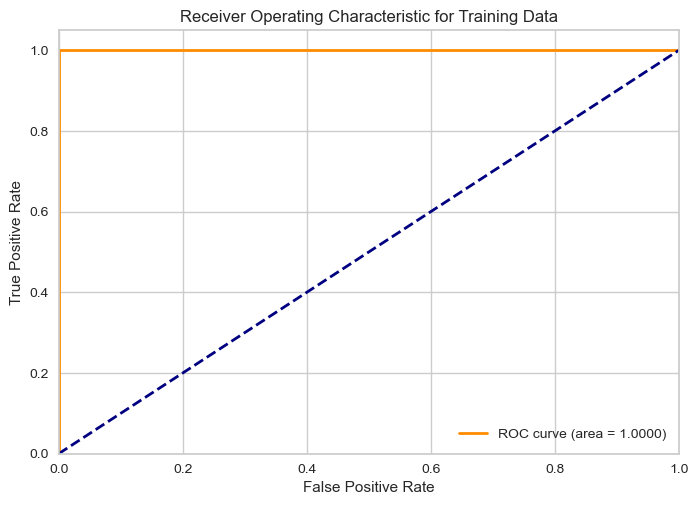

In [56]:
# Generate ROC curve for training data

fpr, tpr, thresholds = roc_curve(y_train.cat.codes, y_prob_train_rf_1[:,1])
roc_auc = roc_auc_score(y_train.cat.codes, y_prob_train_rf_1[:,1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Training Data')
plt.legend(loc='lower right')
plt.show()

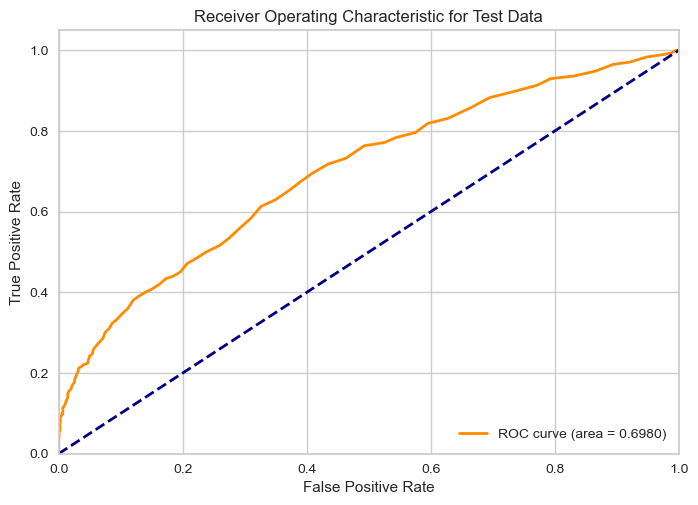

In [57]:
# Generate ROC curve for test data
fpr, tpr, thresholds = roc_curve(y_test.cat.codes, y_prob_test_rf_1[:,1])
roc_auc = roc_auc_score(y_test.cat.codes, y_prob_test_rf_1[:,1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Test Data')
plt.legend(loc='lower right')
plt.show()


   importance          feature
0    0.254519               ID
1    0.199924          DemAffl
2    0.147175       DemCluster
7    0.115307        PromSpend
8    0.106526         PromTime
5    0.075047         DemTVReg
4    0.042373           DemReg
3    0.040943  DemClusterGroup
6    0.018186        PromClass


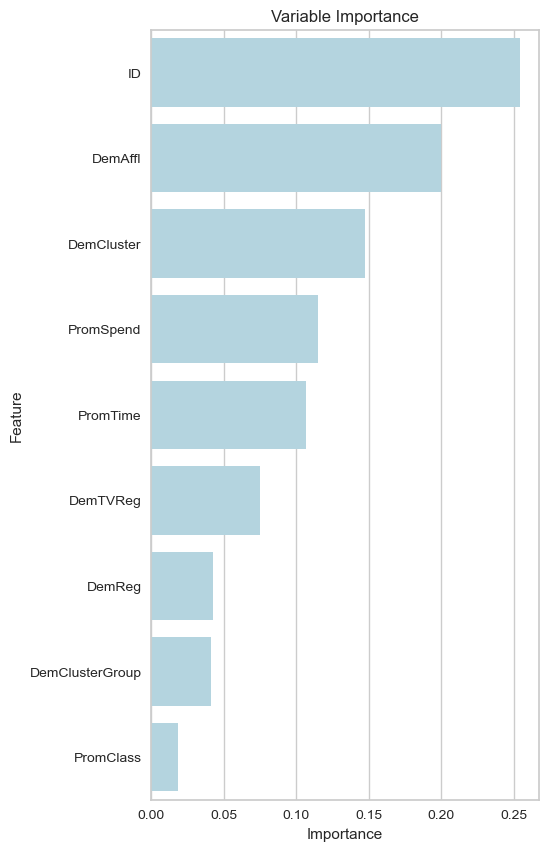

In [58]:
#calculate feature importance
rf_imp = rf_1.feature_importances_

#create a data frame with feature names

# creating a list of column names
column_values = ['importance']

# creating the dataframe
df = pd.DataFrame(data = rf_imp,
                  columns = column_values)
df['feature']=X.columns

#sort data so features with largest importance values are at the top
df2 = df.sort_values(by=['importance'], ascending=False)

print(df2)

#Create variable importance plot
plt.figure(figsize=(5, 10))
plt.title('Variable Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
sns.barplot(data=df2,
            y=df2['feature'],
            x=df2['importance'], color="lightblue")

plt.show()

In [59]:
# create an instance of a random forest classifier using default values and overfitting controls

rf_2 = RandomForestClassifier(n_estimators=100, max_features="sqrt", max_depth=5, min_samples_leaf=100, random_state=904)

# fit the model to the training data
rf_2.fit(X_train, y_train)

#'max_depth': None, 'max_features': 6, 'min_samples_leaf': 1, 'n_estimators': 150

RandomForestClassifier(max_depth=5, min_samples_leaf=100, random_state=904)

In [61]:
# make predictions on the training and test data
y_pred_train_rf_2 = rf_2.predict(X_train)
y_pred_test_rf_2 = rf_2.predict(X_test)

y_prob_train_rf_2 = rf_2.predict_proba(X_train)
y_prob_test_rf_2 = rf_2.predict_proba(X_test)

In [62]:
# calculate the accuracy, precision, and recall scores
acc_train = accuracy_score(y_train, y_pred_train_rf_2)
prec_train = precision_score(y_train, y_pred_train_rf_2)
rec_train = recall_score(y_train, y_pred_train_rf_2)

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc_train))
print("Precision: {:.4f}".format(prec_train))
print("Recall.  : {:.4f}".format(rec_train))
print("")

# calculate the accuracy, precision, and recall scores
acc_test = accuracy_score(y_test, y_pred_test_rf_2)
prec_test = precision_score(y_test, y_pred_test_rf_2)
rec_test = recall_score(y_test, y_pred_test_rf_2)

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc_test))
print("Precision: {:.4f}".format(prec_test))
print("Recall.  : {:.4f}".format(rec_test))

 -- train set -- 
Accuracy : 0.7849
Precision: 0.7052
Recall.  : 0.2104

 -- test set -- 
Accuracy : 0.7878
Precision: 0.7273
Recall.  : 0.2140


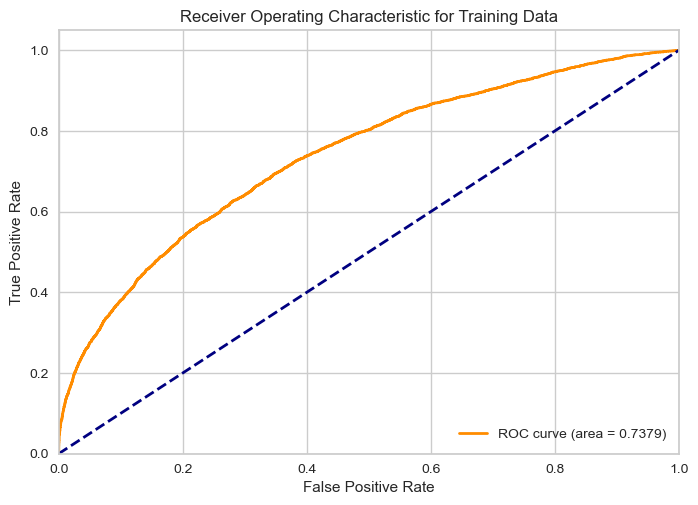

In [63]:
# Generate ROC curve for training data

fpr, tpr, thresholds = roc_curve(y_train.cat.codes, y_prob_train_rf_2[:,1])
roc_auc = roc_auc_score(y_train.cat.codes, y_prob_train_rf_2[:,1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Training Data')
plt.legend(loc='lower right')
plt.show()

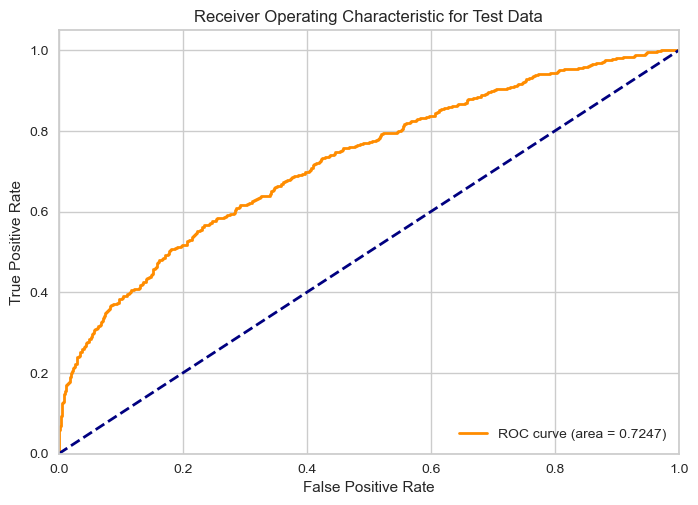

In [64]:
# Generate ROC curve for test data
fpr, tpr, thresholds = roc_curve(y_test.cat.codes, y_prob_test_rf_2[:,1])
roc_auc = roc_auc_score(y_test.cat.codes, y_prob_test_rf_2[:,1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Test Data')
plt.legend(loc='lower right')
plt.show()


   importance          feature
1    0.800728          DemAffl
7    0.089548        PromSpend
6    0.035849        PromClass
8    0.024275         PromTime
2    0.017687       DemCluster
0    0.013228               ID
3    0.008981  DemClusterGroup
5    0.007078         DemTVReg
4    0.002624           DemReg


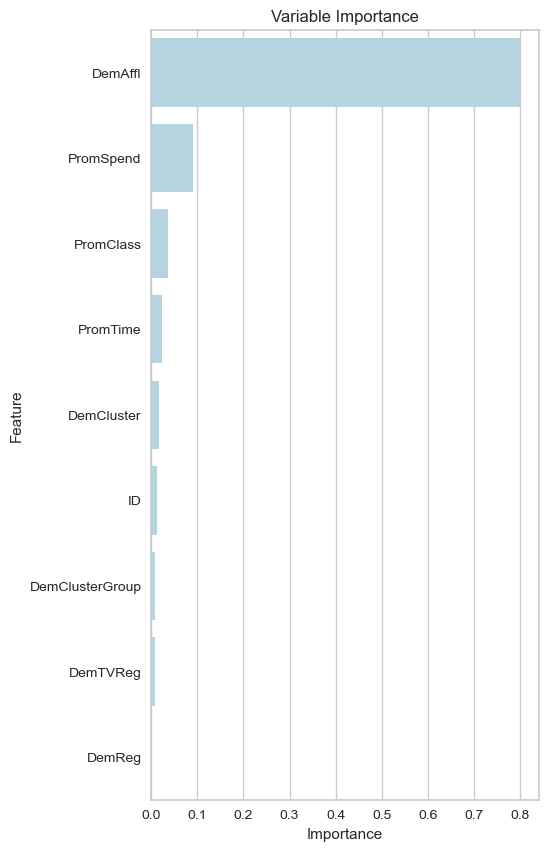

In [65]:
#calculate feature importance
rf_imp = rf_2.feature_importances_

#create a data frame with feature names

# creating a list of column names
column_values = ['importance']

# creating the dataframe
df = pd.DataFrame(data = rf_imp,
                  columns = column_values)
df['feature']=X.columns

#sort data so features with largest importance values are at the top
df2 = df.sort_values(by=['importance'], ascending=False)

print(df2)

#Create variable importance plot
plt.figure(figsize=(5, 10))
plt.title('Variable Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
sns.barplot(data=df2,
            y=df2['feature'],
            x=df2['importance'], color="lightblue")

plt.show()

In [66]:
# create an instance of a random forest classifier using tuned values  (max 10 min 100)

rf_3 = RandomForestClassifier(n_estimators=150, max_features=6, max_depth=15, min_samples_leaf=50, random_state=904)

# fit the model to the training data
rf_3.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, max_features=6, min_samples_leaf=50,
                       n_estimators=150, random_state=904)

In [67]:
# make predictions on the training and test data
y_pred_train_rf_3 = rf_3.predict(X_train)
y_pred_test_rf_3 = rf_3.predict(X_test)

y_prob_train_rf_3 = rf_3.predict_proba(X_train)
y_prob_test_rf_3 = rf_3.predict_proba(X_test)



In [69]:
# calculate the accuracy, precision, and recall scores
acc_train = accuracy_score(y_train, y_pred_train_rf_3)
prec_train = precision_score(y_train, y_pred_train_rf_3)
rec_train = recall_score(y_train, y_pred_train_rf_3)

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc_train))
print("Precision: {:.4f}".format(prec_train))
print("Recall.  : {:.4f}".format(rec_train))
print("")

# calculate the accuracy, precision, and recall scores
acc_test = accuracy_score(y_test, y_pred_test_rf_3)
prec_test = precision_score(y_test, y_pred_test_rf_3)
rec_test = recall_score(y_test, y_pred_test_rf_3)

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc_test))
print("Precision: {:.4f}".format(prec_test))
print("Recall.  : {:.4f}".format(rec_test))

 -- train set -- 
Accuracy : 0.7897
Precision: 0.7071
Recall.  : 0.2426

 -- test set -- 
Accuracy : 0.7848
Precision: 0.6766
Recall.  : 0.2325


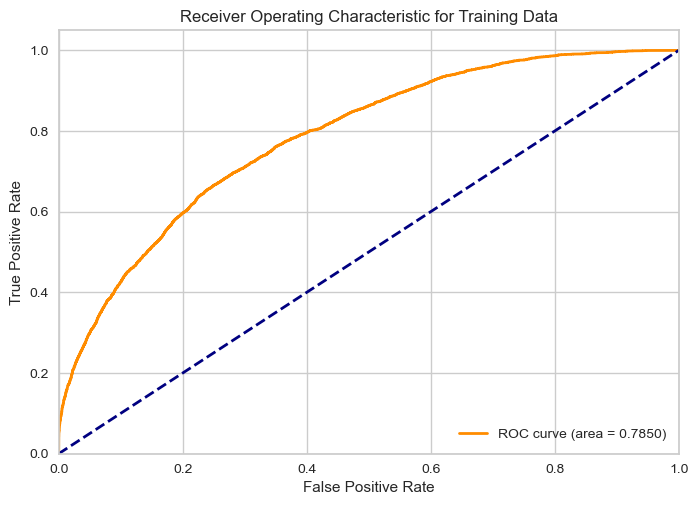

In [70]:
# Generate ROC curve for training data

fpr, tpr, thresholds = roc_curve(y_train.cat.codes, y_prob_train_rf_3[:,1])
roc_auc = roc_auc_score(y_train.cat.codes, y_prob_train_rf_3[:,1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Training Data')
plt.legend(loc='lower right')
plt.show()

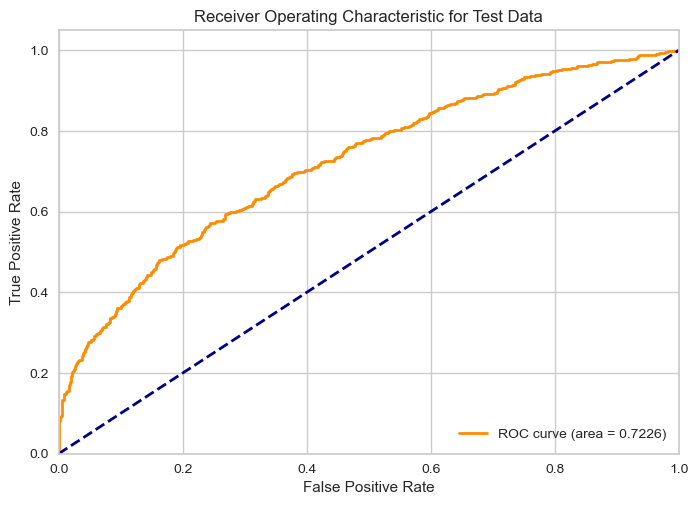

In [71]:
# Generate ROC curve for test data
fpr, tpr, thresholds = roc_curve(y_test.cat.codes, y_prob_test_rf_3[:,1])
roc_auc = roc_auc_score(y_test.cat.codes, y_prob_test_rf_3[:,1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Test Data')
plt.legend(loc='lower right')
plt.show()

   importance          feature
1    0.671473          DemAffl
7    0.093495        PromSpend
0    0.077065               ID
2    0.054754       DemCluster
8    0.042111         PromTime
5    0.025158         DemTVReg
4    0.014823           DemReg
6    0.012273        PromClass
3    0.008849  DemClusterGroup


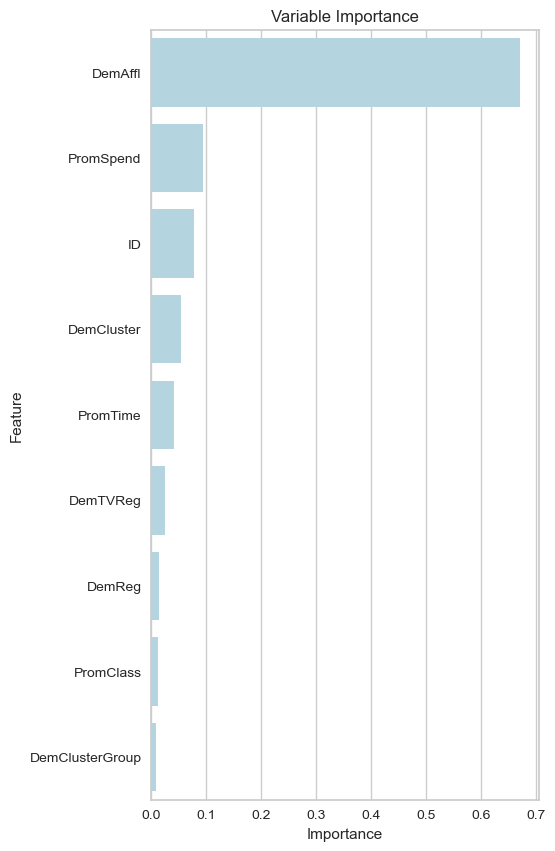

In [73]:
#calculate feature importance
rf_imp = rf_3.feature_importances_

#create a data frame with feature names

# creating a list of column names
column_values = ['importance']

# creating the dataframe
df = pd.DataFrame(data = rf_imp,
                  columns = column_values)
df['feature']=X.columns

#sort data so features with largest importance values are at the top
df2 = df.sort_values(by=['importance'], ascending=False)

print(df2)

#Create variable importance plot
plt.figure(figsize=(5, 10))
plt.title('Variable Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
sns.barplot(data=df2,
            y=df2['feature'],
            x=df2['importance'], color="lightblue")

plt.show()

# Tuning the parameters of a random forest - RUN WITH CAUTION

This section of code illustrates one method for tuning the parameters of a random forest model.  Because the code is doing a grid search over multiple complex models, this code can take over an hour to run.

In [74]:
rf_tune = RandomForestClassifier()

param_grid = {
    'n_estimators':[10, 50, 150, 500],
    'max_features':['sqrt', 2, 4, 6],
    'max_depth': [None, 5],
    'min_samples_leaf': [1, 100],
}

grid_search = GridSearchCV(rf_tune, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print(best_params)
print(best_estimator)

{'max_depth': None, 'max_features': 4, 'min_samples_leaf': 1, 'n_estimators': 500}
RandomForestClassifier(max_features=4, n_estimators=500)



# Gradient Boosting  
We will use 2 primary parameters to control the boosting

- **n_estimators** determines the number of bootstrap samples to be taken or in other words the number of trees to be generated. Default value = 100

- **learning_rate** is the shrinkage parameter (lambda) which controls the sequential weighting. Default value = 0.1.  

Parameters are also availabe to control the growth of the tree.  By default, gradient boosting models grow shallow trees that use all of the input variables.

- **max_depth** determines the maximum number of levels for the tree. Smaller values help to prevent overfitting. Default value = 3



In [77]:
# create an instance of the Gradient Boosting Classifier using default values

gb = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, max_depth=3, random_state=904)


# fit the model to the training data
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=904)

In [78]:
# make predictions on the training and test data
y_pred_train_gb = gb.predict(X_train)
y_pred_test_gb = gb.predict(X_test)

y_prob_train_gb = gb.predict_proba(X_train)
y_prob_test_gb = gb.predict_proba(X_test)

In [79]:
# calculate the accuracy, precision, and recall scores
acc_train = accuracy_score(y_train, y_pred_train_gb)
prec_train = precision_score(y_train, y_pred_train_gb)
rec_train = recall_score(y_train, y_pred_train_gb)

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc_train))
print("Precision: {:.4f}".format(prec_train))
print("Recall.  : {:.4f}".format(rec_train))
print("")

# calculate the accuracy, precision, and recall scores
acc_test = accuracy_score(y_test, y_pred_test_gb)
prec_test = precision_score(y_test, y_pred_test_gb)
rec_test = recall_score(y_test, y_pred_test_gb)

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc_test))
print("Precision: {:.4f}".format(prec_test))
print("Recall.  : {:.4f}".format(rec_test))

 -- train set -- 
Accuracy : 0.7883
Precision: 0.7035
Recall.  : 0.2358

 -- test set -- 
Accuracy : 0.7863
Precision: 0.6937
Recall.  : 0.2284


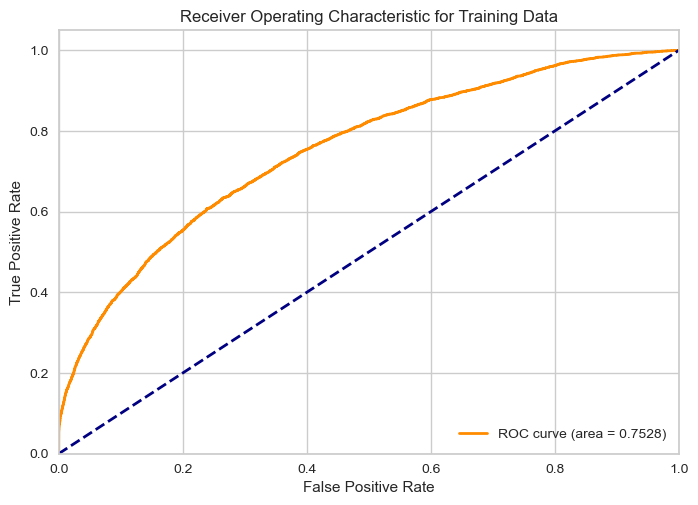

In [80]:
# Generate ROC curve for training data

fpr, tpr, thresholds = roc_curve(y_train.cat.codes, y_prob_train_gb[:,1])
roc_auc = roc_auc_score(y_train.cat.codes, y_prob_train_gb[:,1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Training Data')
plt.legend(loc='lower right')
plt.show()

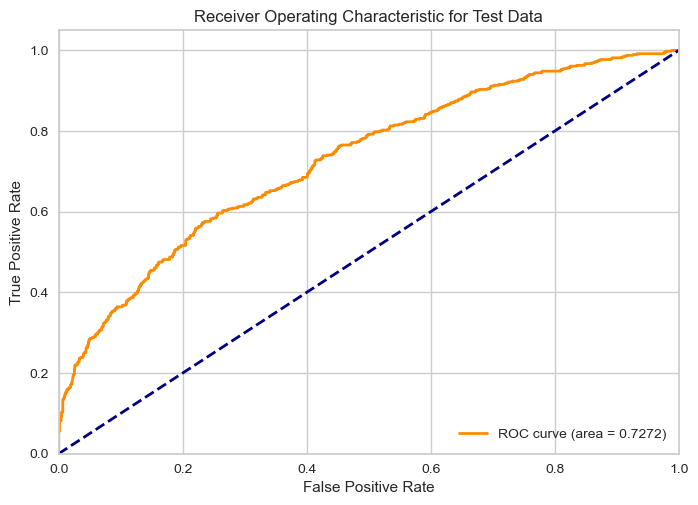

In [81]:
# Generate ROC curve for test data
fpr, tpr, thresholds = roc_curve(y_test.cat.codes, y_prob_test_gb[:,1])
roc_auc = roc_auc_score(y_test.cat.codes, y_prob_test_gb[:,1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Test Data')
plt.legend(loc='lower right')
plt.show()


   importance          feature
1    0.789042          DemAffl
7    0.106054        PromSpend
0    0.043954               ID
2    0.024720       DemCluster
8    0.024476         PromTime
5    0.009422         DemTVReg
4    0.001446           DemReg
3    0.000649  DemClusterGroup
6    0.000238        PromClass


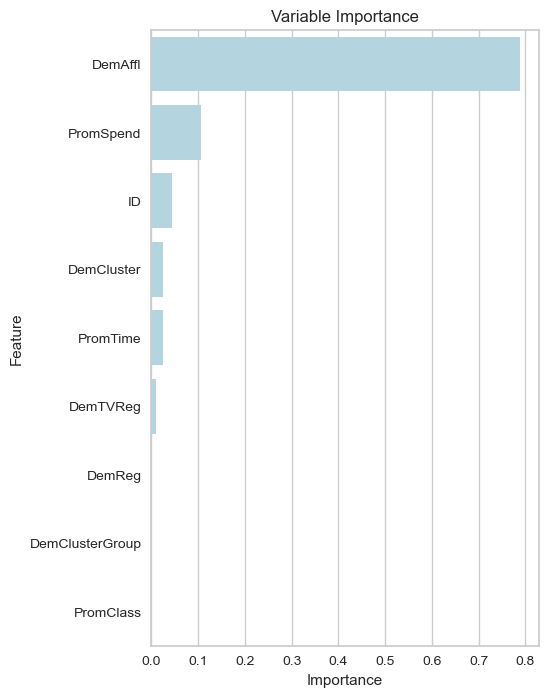

In [83]:
#calculate feature importance
gb_imp = gb.feature_importances_

#create a data frame with feature names

# creating a list of column names
column_values = ['importance']

# creating the dataframe
df = pd.DataFrame(data = gb_imp,
                  columns = column_values)
df['feature']=X.columns

#sort data so features with largest importance values are at the top
df2 = df.sort_values(by=['importance'], ascending=False)

print(df2)

#Create variable importance plot
plt.figure(figsize=(5, 8))
plt.title('Variable Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
sns.barplot(data=df2,
            y=df2['feature'],
            x=df2['importance'], color="lightblue")

plt.show()